# Employee Retention

## Goal

Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).


In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.


## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as average salary during her tenure, department, and years of experience.
As said above, the goal is to predict employee retention and understand its main drivers


In [2]:
#Data Analysis
import pandas as pd
import numpy as np
import missingno as msno

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../employee_retention.csv')
data.pop('Unnamed: 0')
data.describe()

,employee_id,company_id,seniority,salary
count,3.470200e+04,34702.000000,34702.000000,34463.000000
mean,6.466667e+05,4.023370,10.056625,100280.585004
std,3.337653e+05,2.911201,9.355505,87322.502536
min,3.600000e+01,1.000000,0.000000,5000.000000
25%,3.529228e+05,1.000000,0.000000,9302.000000
50%,7.063230e+05,3.000000,8.000000,88000.000000
75%,1.001324e+06,6.000000,18.000000,158000.000000
max,1.009999e+06,12.000000,99.000000,408000.000000


In [4]:
print(set(data.dept))
print(set(data.company_id))

{'marketing', 'customer_service', 'design', 'data_science', 'engineer', 'sales', 'temp_contractor'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


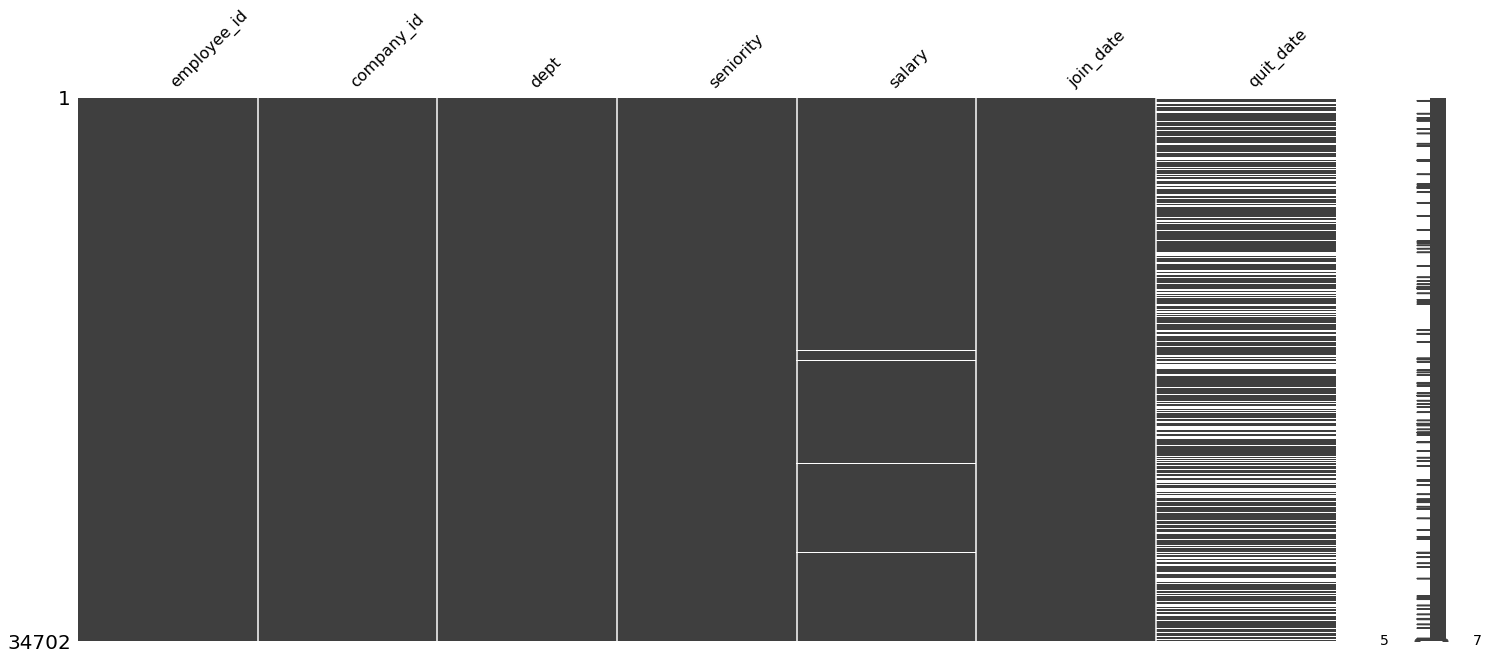

In [5]:
msno.matrix(data)

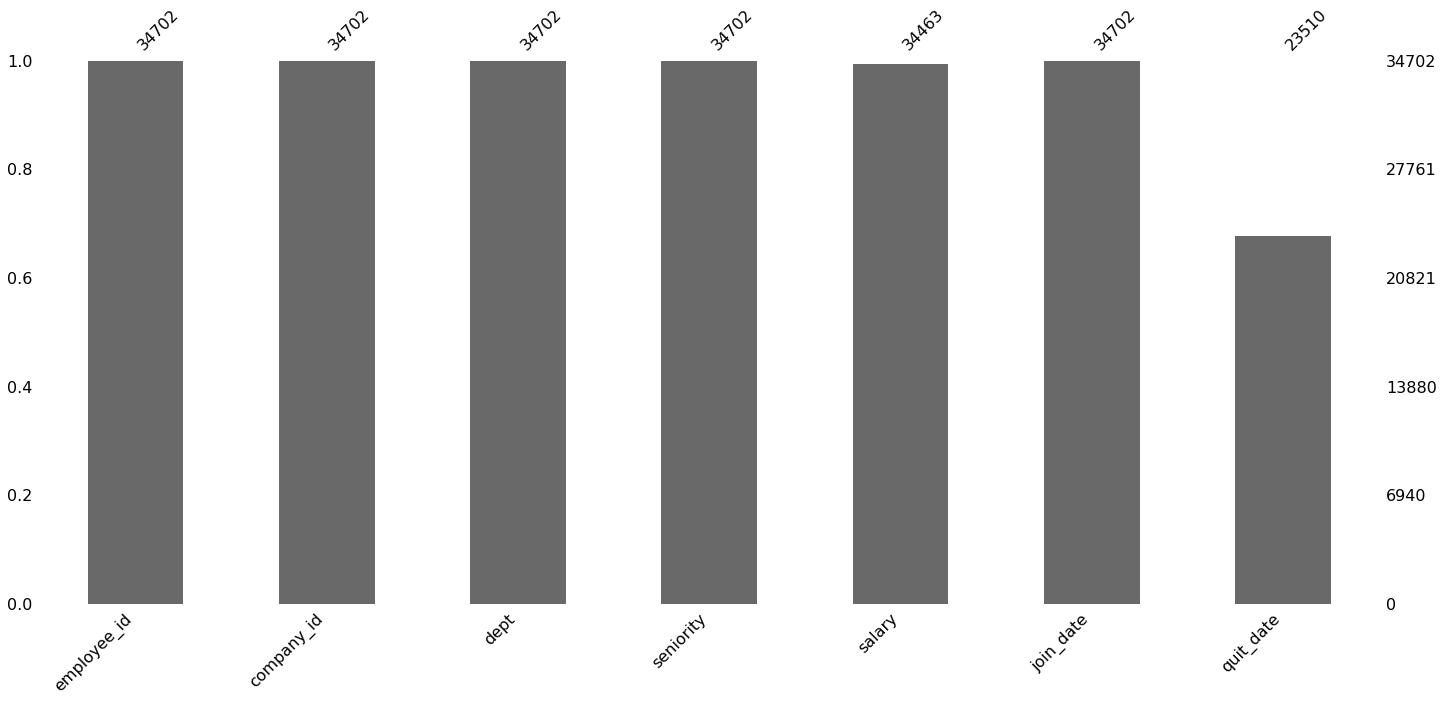

In [6]:
msno.bar(data)

## Salary by Company

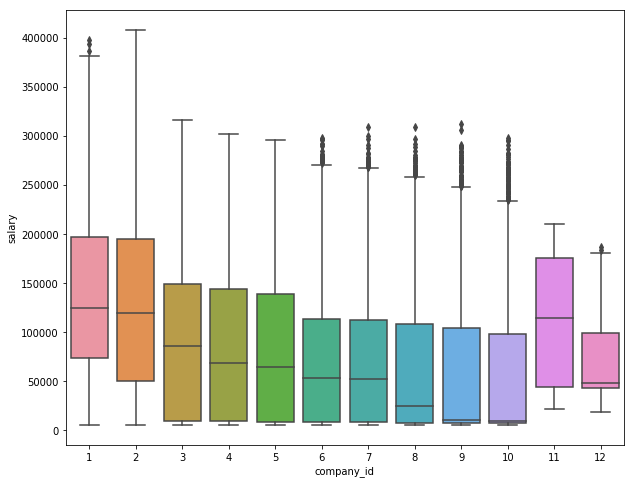

In [7]:
plt.figure(figsize=(10,8))
#sns.violinplot(data=data, x = "company_id", y="salary")
sns.boxplot(data=data, x="company_id", y= "salary")

## Salary by Department

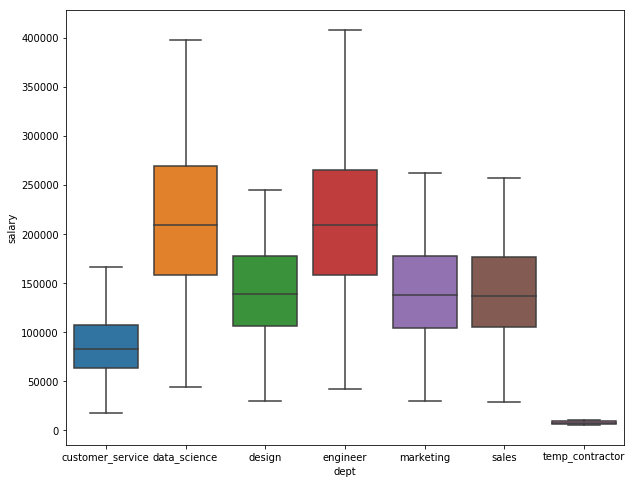

In [8]:
plt.figure(figsize=(10,8))
dept= list(set(data['dept']))
dept.sort()

sns.boxplot(data=data, x="dept", y="salary", order= dept)

## Salary by Seniority

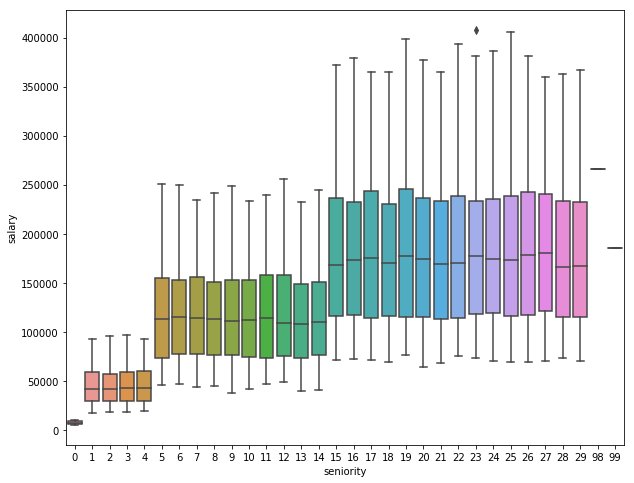

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x="seniority", y= "salary")

## Salary distribution across Seniority and Company

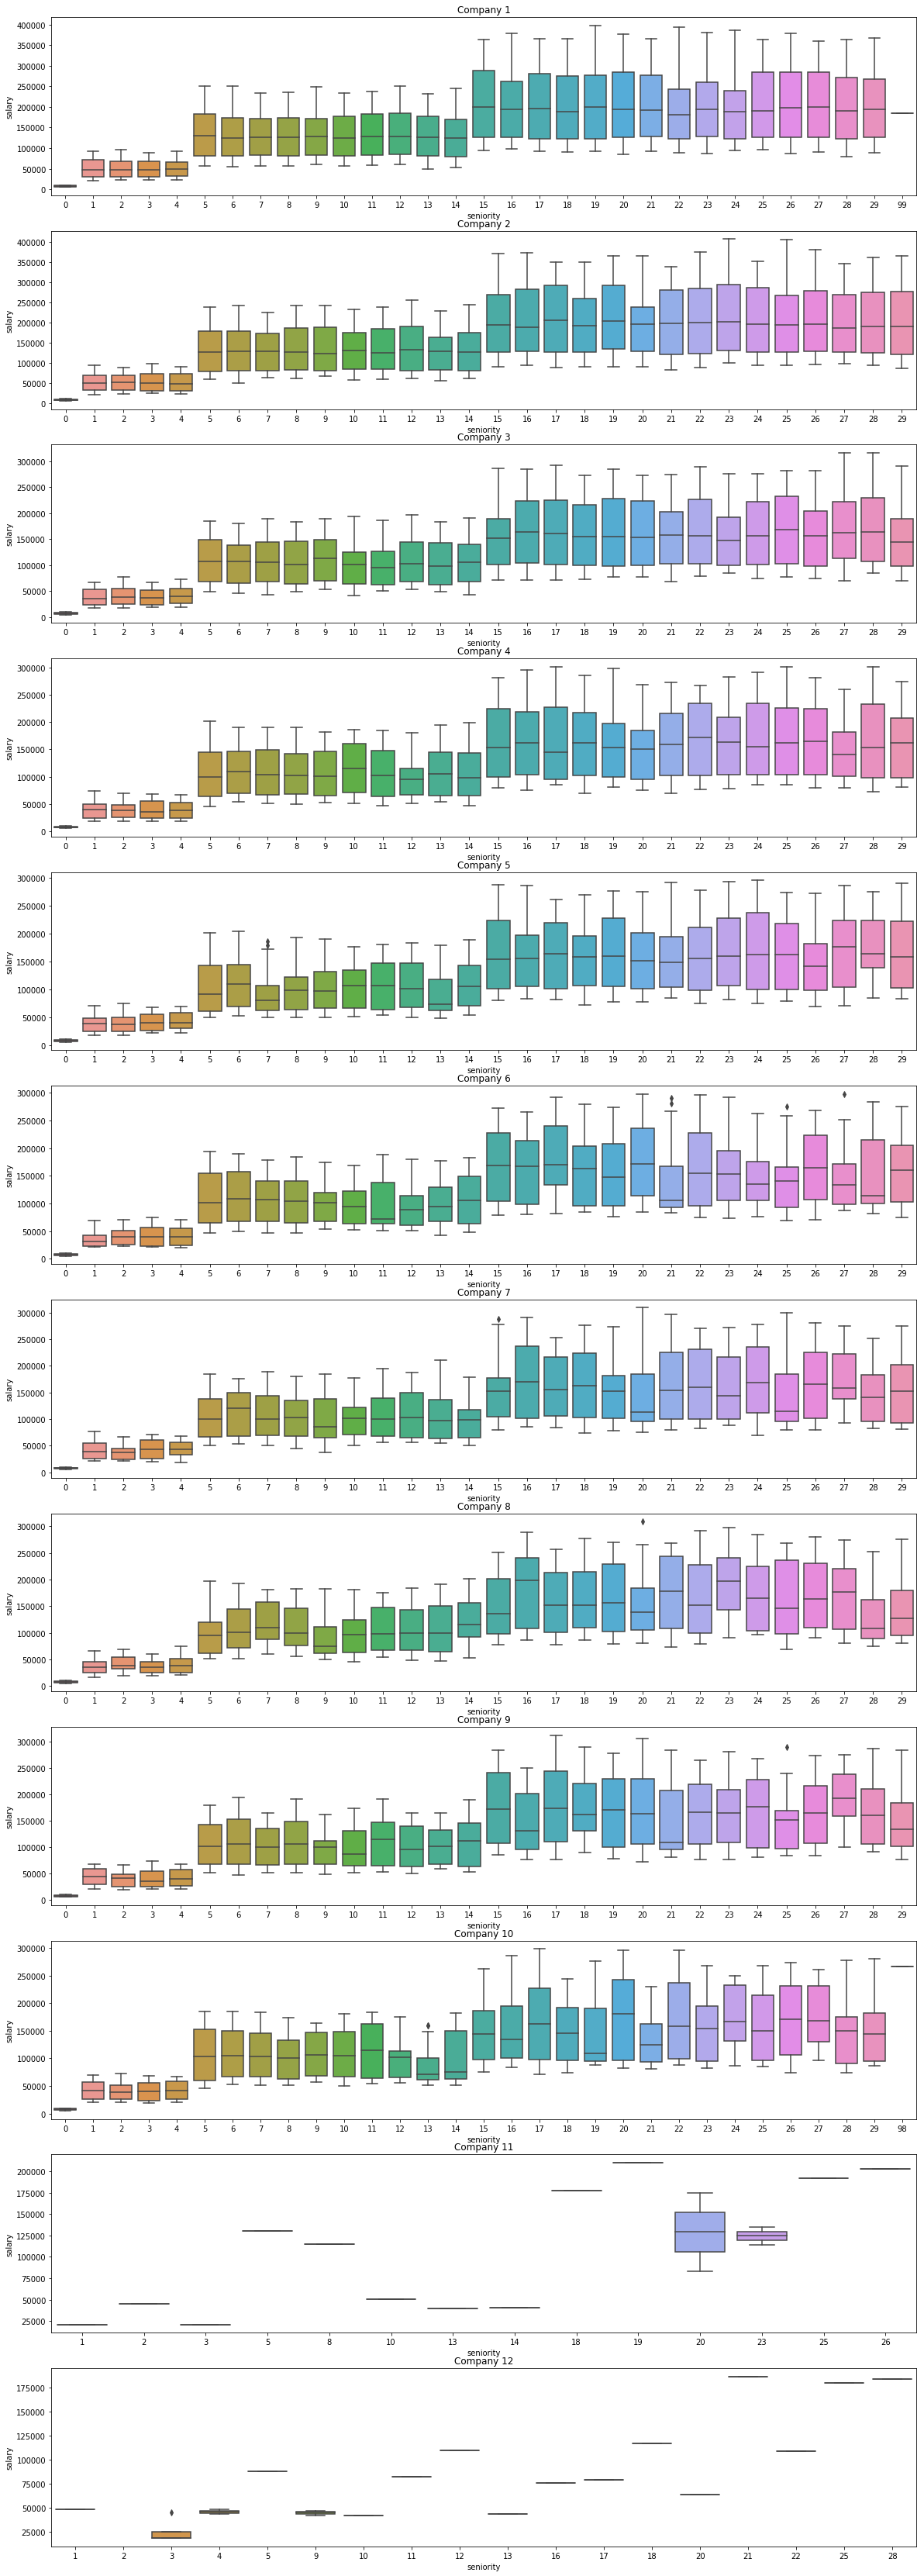

In [10]:
plt.figure(figsize=(20,60))
sns.boxplot(data=data, x = "seniority", y="salary")
for i in range(12):
    plt.subplot(12,1,i+1)
    sns.boxplot(data=data[data['company_id']== i+1], x="seniority", y="salary")
    plt.title("Company {}".format(i+1))

## Salary across Department and Companies

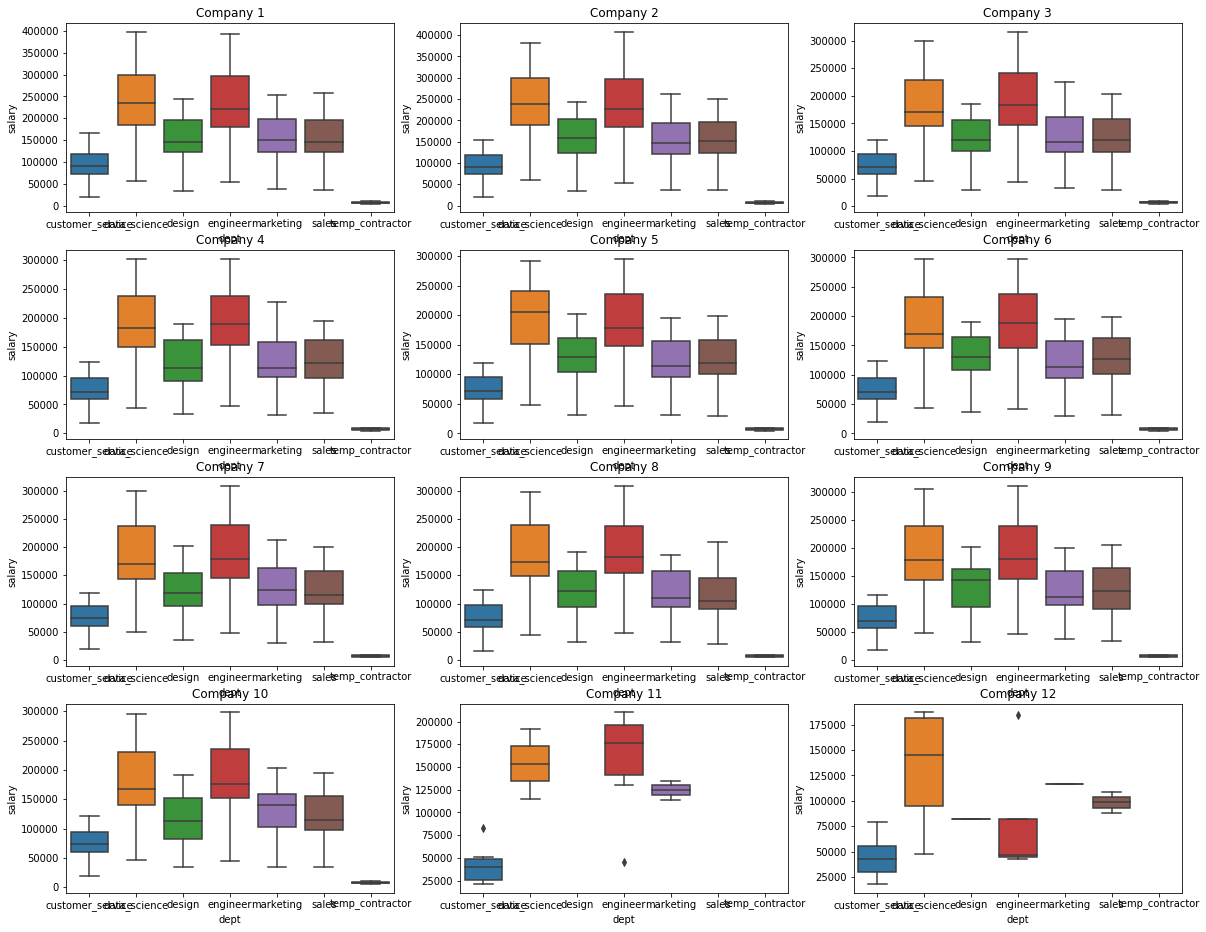

In [11]:
plt.figure(figsize=(20,16))
dept = list(set(data['dept']))
dept.sort()
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=data[data['company_id']==i+1], x="dept", y="salary", order=dept)
    plt.title("Company {}".format(i+1))

## How many employees are there in each company?

Text(0.5, 1.0, 'Number of Employees at Each Company')

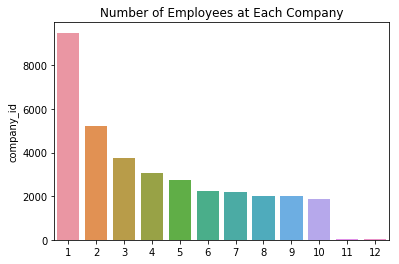

In [12]:
sns.barplot(x=list(range(1,13)), y= data.company_id.value_counts())
plt.title("Number of Employees at Each Company")


## Insights from EDA
    - Salary distribution is delineated by three buckets (0-4, 5-14, and 15-29)
    - Companies 1 and 2 offer the highest salaries
    - Salary distribution by department is consistent across companies
    - Data scientists + Engineers have the highest salaries// customer service, the lowest
    - Company 1 has the most employees (9501)

## Calculate time employee spent at each company using time stamps

In [13]:
join_timestamp= [pd.Timestamp(data['join_date'][i]) for i in range(len(data))]

In [14]:
quit_timestamp = []
for i in range(len(data)):
    try:
        ts= pd.Timestamp(data['quit_date'][i])
        quit_timestamp.append(ts)
    except:
        ts= pd.Timestamp('2015-12-14')
        quit_timestamp.append(ts)

In [15]:
data['join_timestamp'] = join_timestamp
data['quit_timestamp'] = quit_timestamp
data['in_company_for'] = [quit_timestamp[i] - join_timestamp[i] for i in range(len(data))]
ts= [data.in_company_for.values[i].astype('float64')/(60*60*24*1e9) for i in range(len(data))]
data['days_in_company'] = ts

In [16]:
quit = []
for i in range(len(data)):
    if data['days_in_company'][i] < 0:
        quit.append(0)
    else:
        quit.append(1)

data['quit_company'] = quit

## Visualize days in company across companies and departments

In [25]:
quit_data= data[data['days_in_company'] > 0].copy().reset_index(drop=True)
stay_data= data[data['days_in_company'] < 0].copy().reset_index(drop=True)

(array([10011.,    35.,  1708.,  5024.,   562.,   142.,   733.,  1323.,
         1130.,   417.,   301.,   412.,   466.,   333.,   246.,   241.,
          189.,   148.,    64.,    25.]),
 array([  90. ,  171.8,  253.6,  335.4,  417.2,  499. ,  580.8,  662.6,
         744.4,  826.2,  908. ,  989.8, 1071.6, 1153.4, 1235.2, 1317. ,
        1398.8, 1480.6, 1562.4, 1644.2, 1726. ]),
 <a list of 20 Patch objects>)

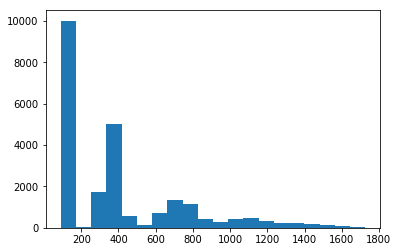

In [30]:
plt.hist(quit_data['days_in_company'].values, bins=20)

Text(0.5, 1.0, 'Days in company across departments')

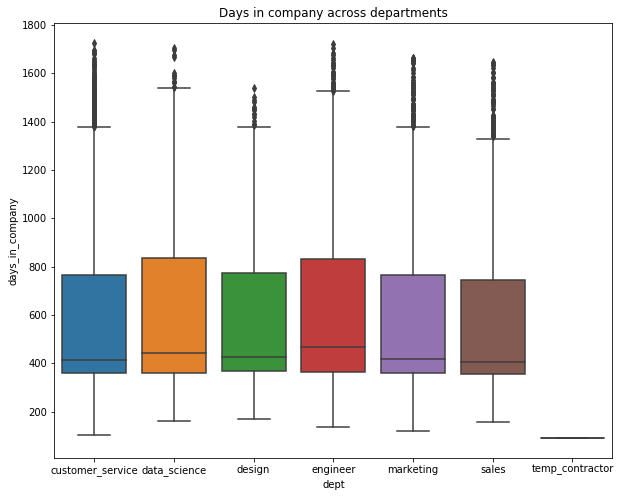

In [32]:
plt.figure(figsize=(10,8))
dept = list(set(quit_data['dept']))

dept.sort()
sns.boxplot(data=quit_data, x="dept", y="days_in_company", order= dept)
plt.title("Days in company across departments")

In [35]:
list(set(quit_data['dept']))

['marketing',
 'customer_service',
 'design',
 'data_science',
 'engineer',
 'sales',
 'temp_contractor']

Text(0.5, 1.0, 'Days in company across companies')

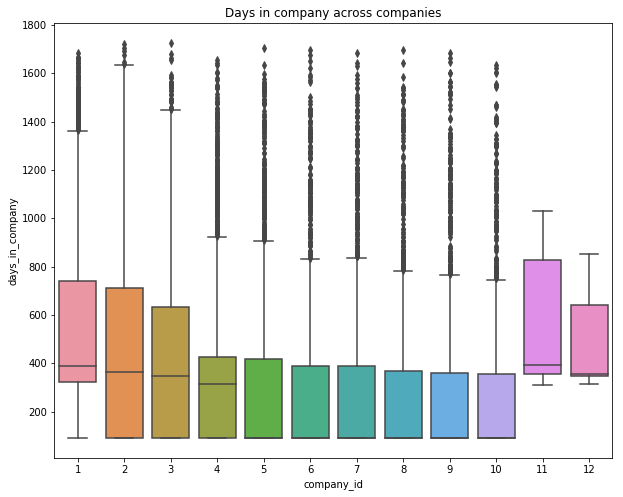

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(data= quit_data, x="company_id", y="days_in_company")
plt.title("Days in company across companies")

## Plot Correlation Matrix


/Users/samchow/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[j])
/Users/samchow/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  ax.set_ylim(boundaries_list[i])
/Users/samchow/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ca52cc0>,
      dtype=object)

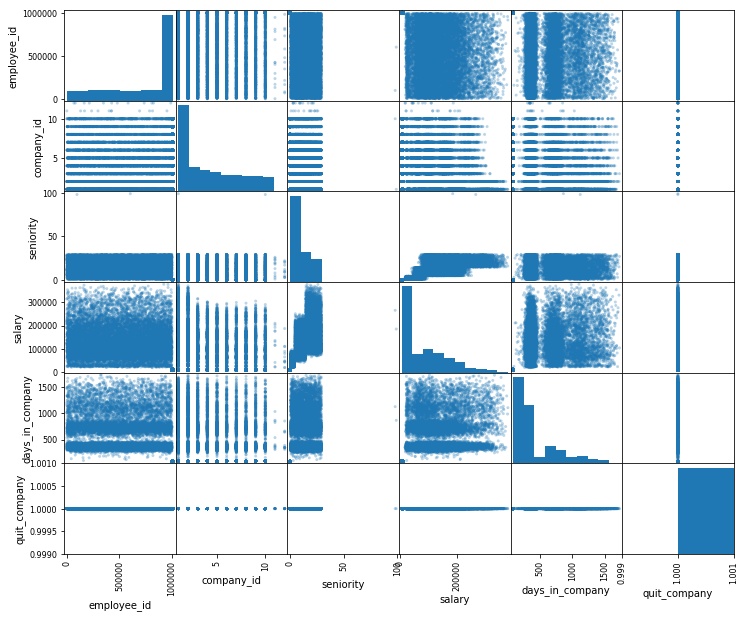

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(quit_data, figsize=(12,10), alpha=0.3)

## Differences between people who leave and those who didn't

In [40]:
data.dept.value_counts()

temp_contractor     10000
customer_service     9180
engineer             4613
data_science         3190
sales                3172
marketing            3167
design               1380
Name: dept, dtype: int64

In [45]:
data[data['dept'] != 'temp_contractor'].quit_company.value_counts()

1    13510
0    11192
Name: quit_company, dtype: int64

In [57]:
quit = data[data['dept'] != 'temp_contractor'].copy().reset_index(drop=True)
quit= quit.groupby('quit_company')
quit.mean()

,employee_id,company_id,seniority,salary,days_in_company
quit_company,,,,,
0,501079.237759,3.387688,14.123392,141192.259112,-106751.991167
1,502039.463138,3.459511,14.131458,135726.511697,613.486825


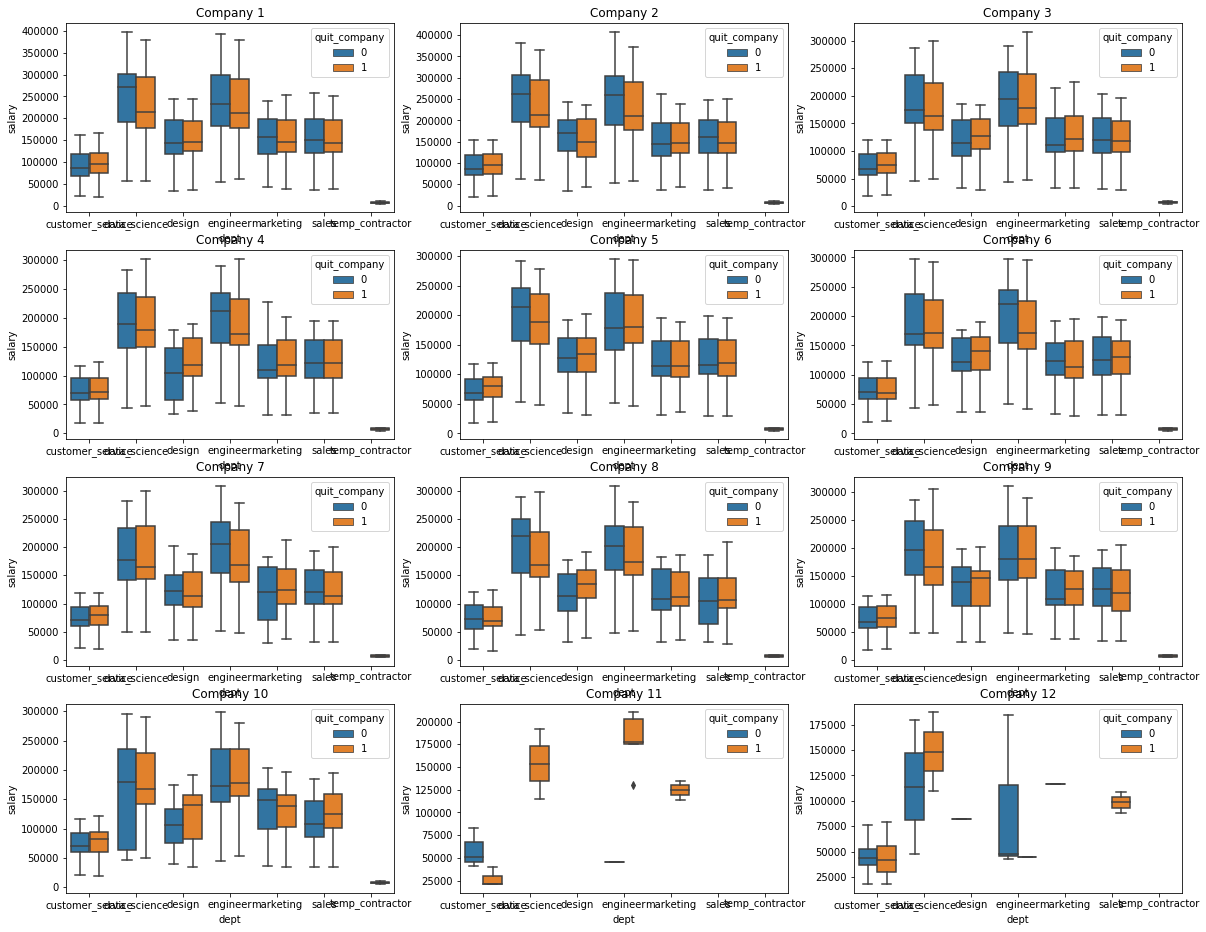

In [62]:
plt.figure(figsize=(20,16))
dept = list(set(data['dept']))
dept.sort()
for i in range (12):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data= data[data['company_id'] == i + 1], x= "dept", y="salary", order= dept, hue= "quit_company")
    plt.title("Company {}".format(i+1))        

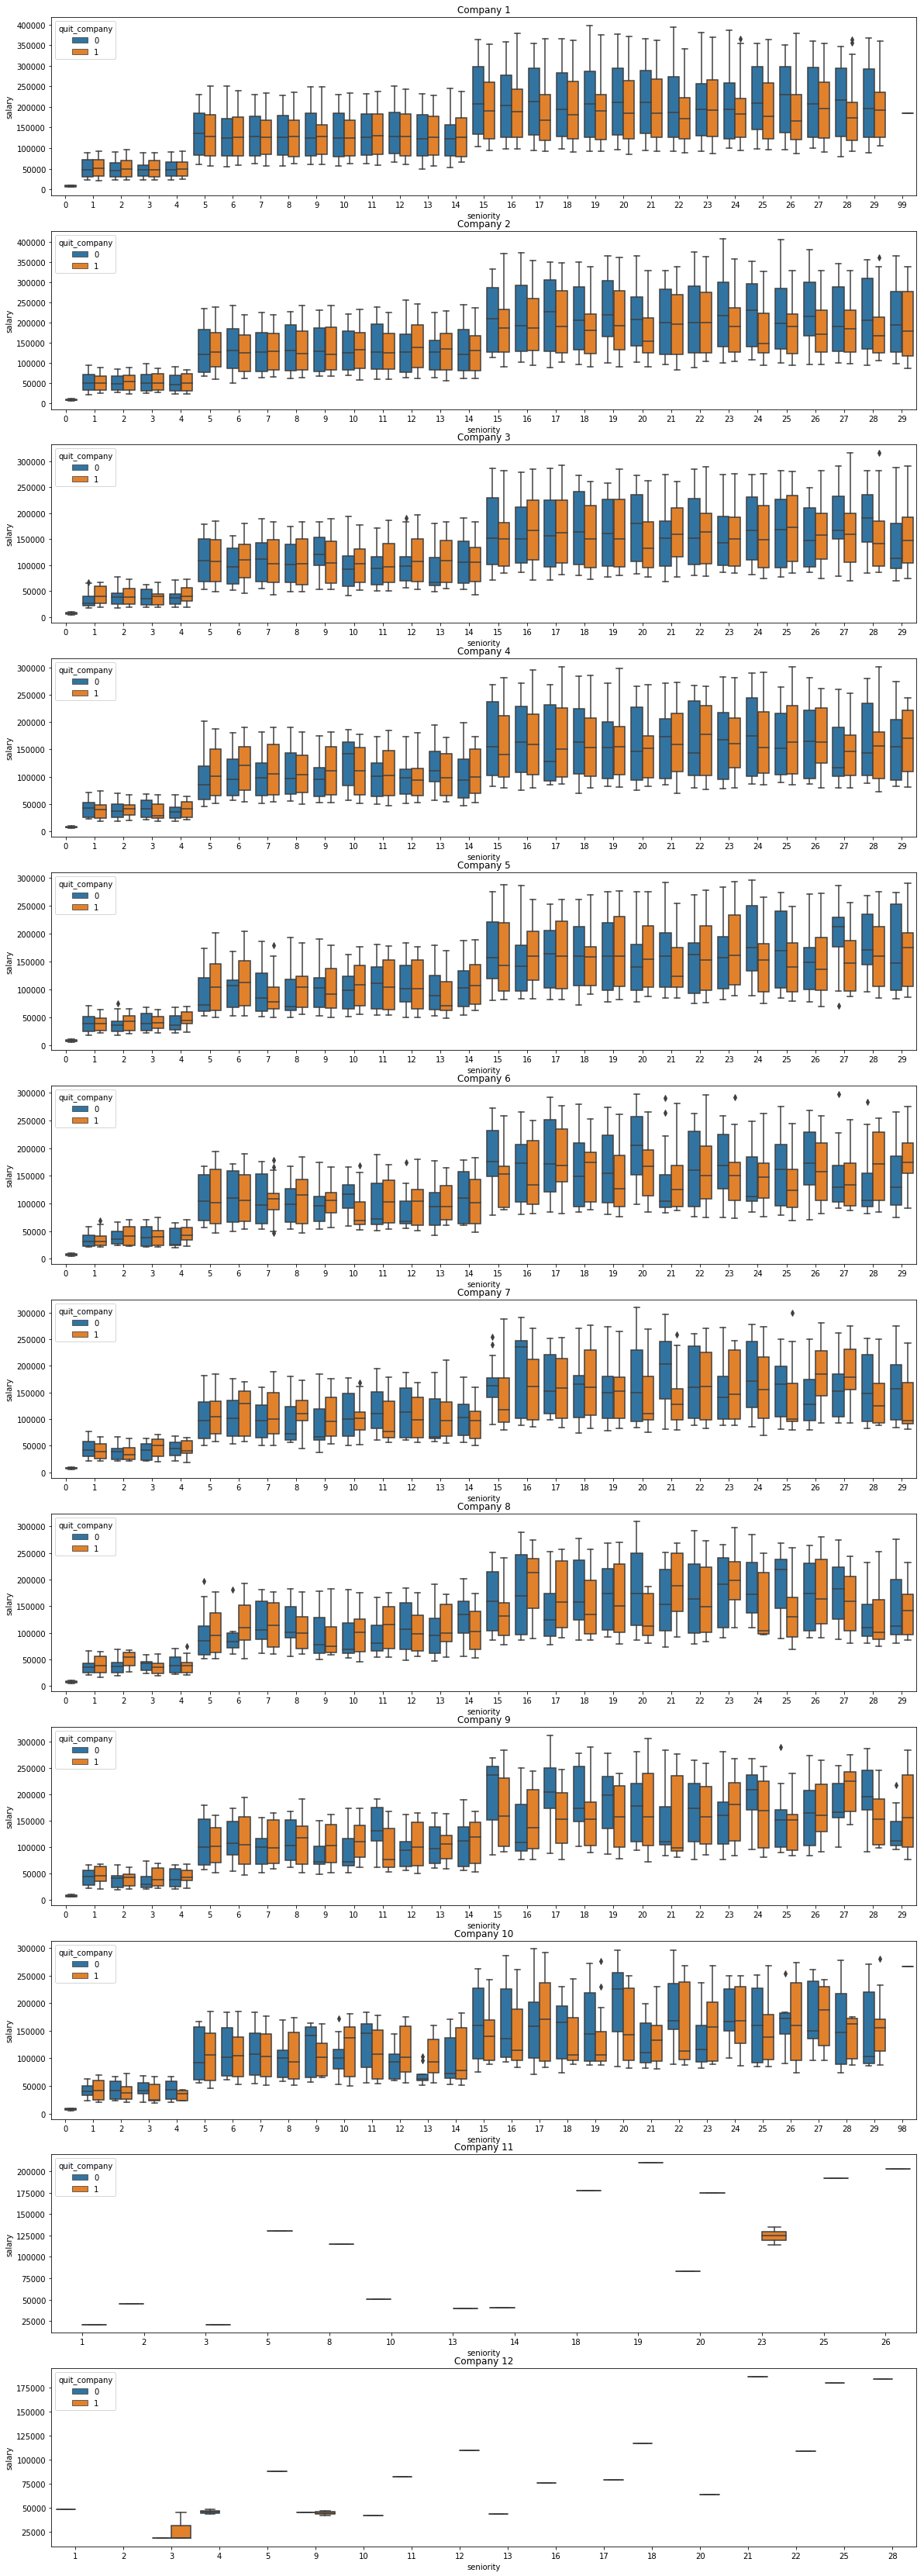

In [63]:
plt.figure(figsize= (20,60))
for i in range(12):
    plt.subplot(12,1,i+1)
    sns.boxplot(data= data[data['company_id'] == i+1], x="seniority", y= "salary", hue="quit_company")
    plt.title("Company {}".format(i+1))

## Insights from comparing both groups
There's a slight salary difference between those that turned over and those who didn't.

# Predictive Modelling

In [82]:
#Import LabelEncoder
from sklearn import preprocessing

#Creating labelEncoder
le= preprocessing.LabelEncoder()

#Converting string labels into numbers.
new_data= data[data['dept'] != 'temp_contractor'].copy().reset_index(drop=True)
new_data= new_data[new_data['seniority'] <= 30].copy().reset_index(drop=True)
to_keep= [i for i in range(len(new_data)) if not np.isnan(new_data['salary'][i])]
new_data= new_data.iloc[to_keep,:].copy().reset_index(drop=True)
new_data['dept_category']= le.fit_transform(new_data['dept'])


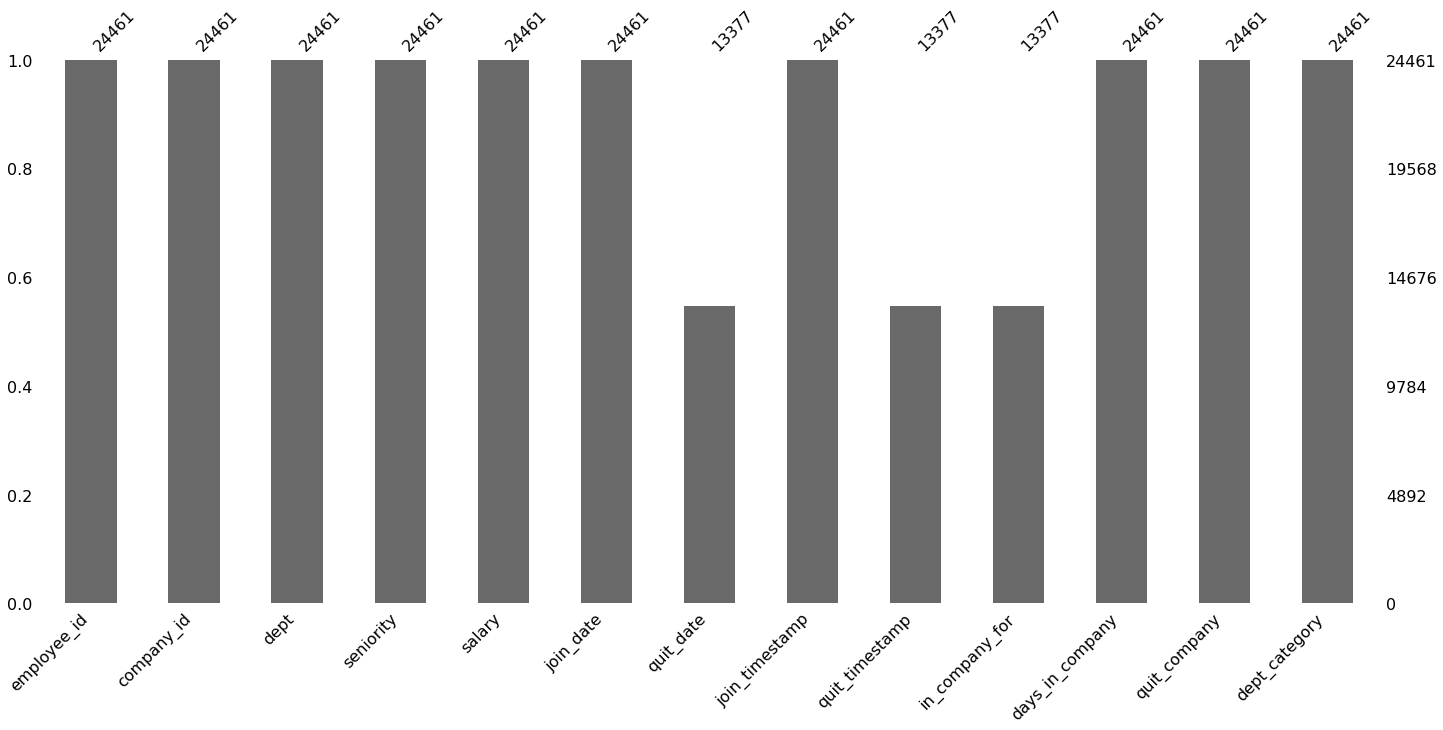

In [84]:
msno.bar(new_data)

In [86]:
#Splitting data into Features
X= new_data[['salary','seniority', 'dept_category']]
y= new_data['quit_company']

#Standard ML Procedure
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [87]:
#Import Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#Create a GB classifier
gb= GradientBoostingClassifier()

#Train the model using training sets
gb.fit(X_train, y_train)

#Predict response for test data
y_pred= gb.predict(X_test)

/Users/samchow/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [89]:
#Output model accuracy
from sklearn import metrics

#Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
#Model Precision
print("Precision: ", metrics.precision_score(y_test,y_pred))
#Model Recall
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.547077258482082
Precision:  0.5492073976221928
Recall:  0.8484693877551021


## Survival Analysis

In [90]:
tmp = new_data[new_data['days_in_company']>0].copy().reset_index(drop=True)

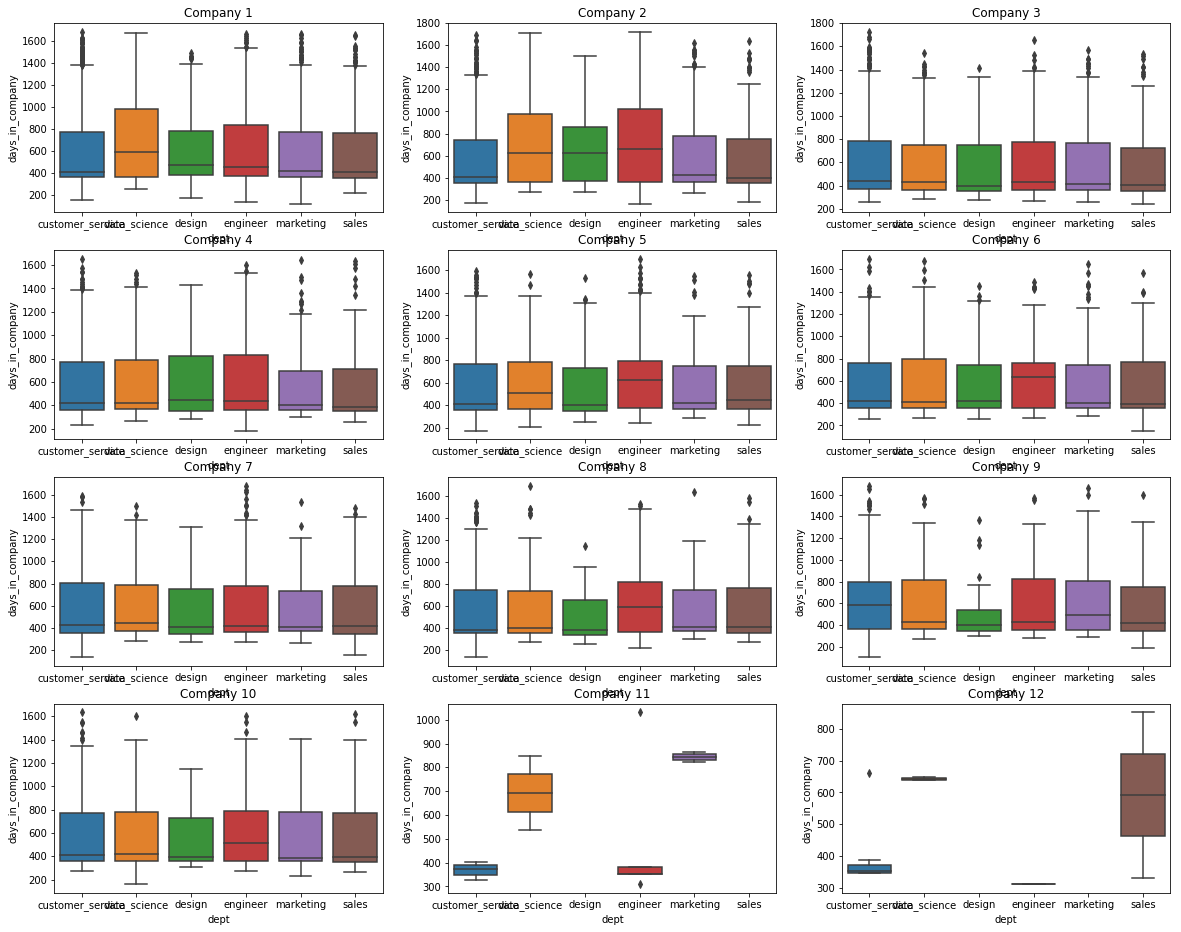

In [91]:
plt.figure(figsize=(20,16))
dept = list(set(tmp['dept']))
dept.sort()
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=tmp[tmp['company_id']==i+1], x="dept", y="days_in_company", order=dept)
    plt.title("Company {}".format(i+1))

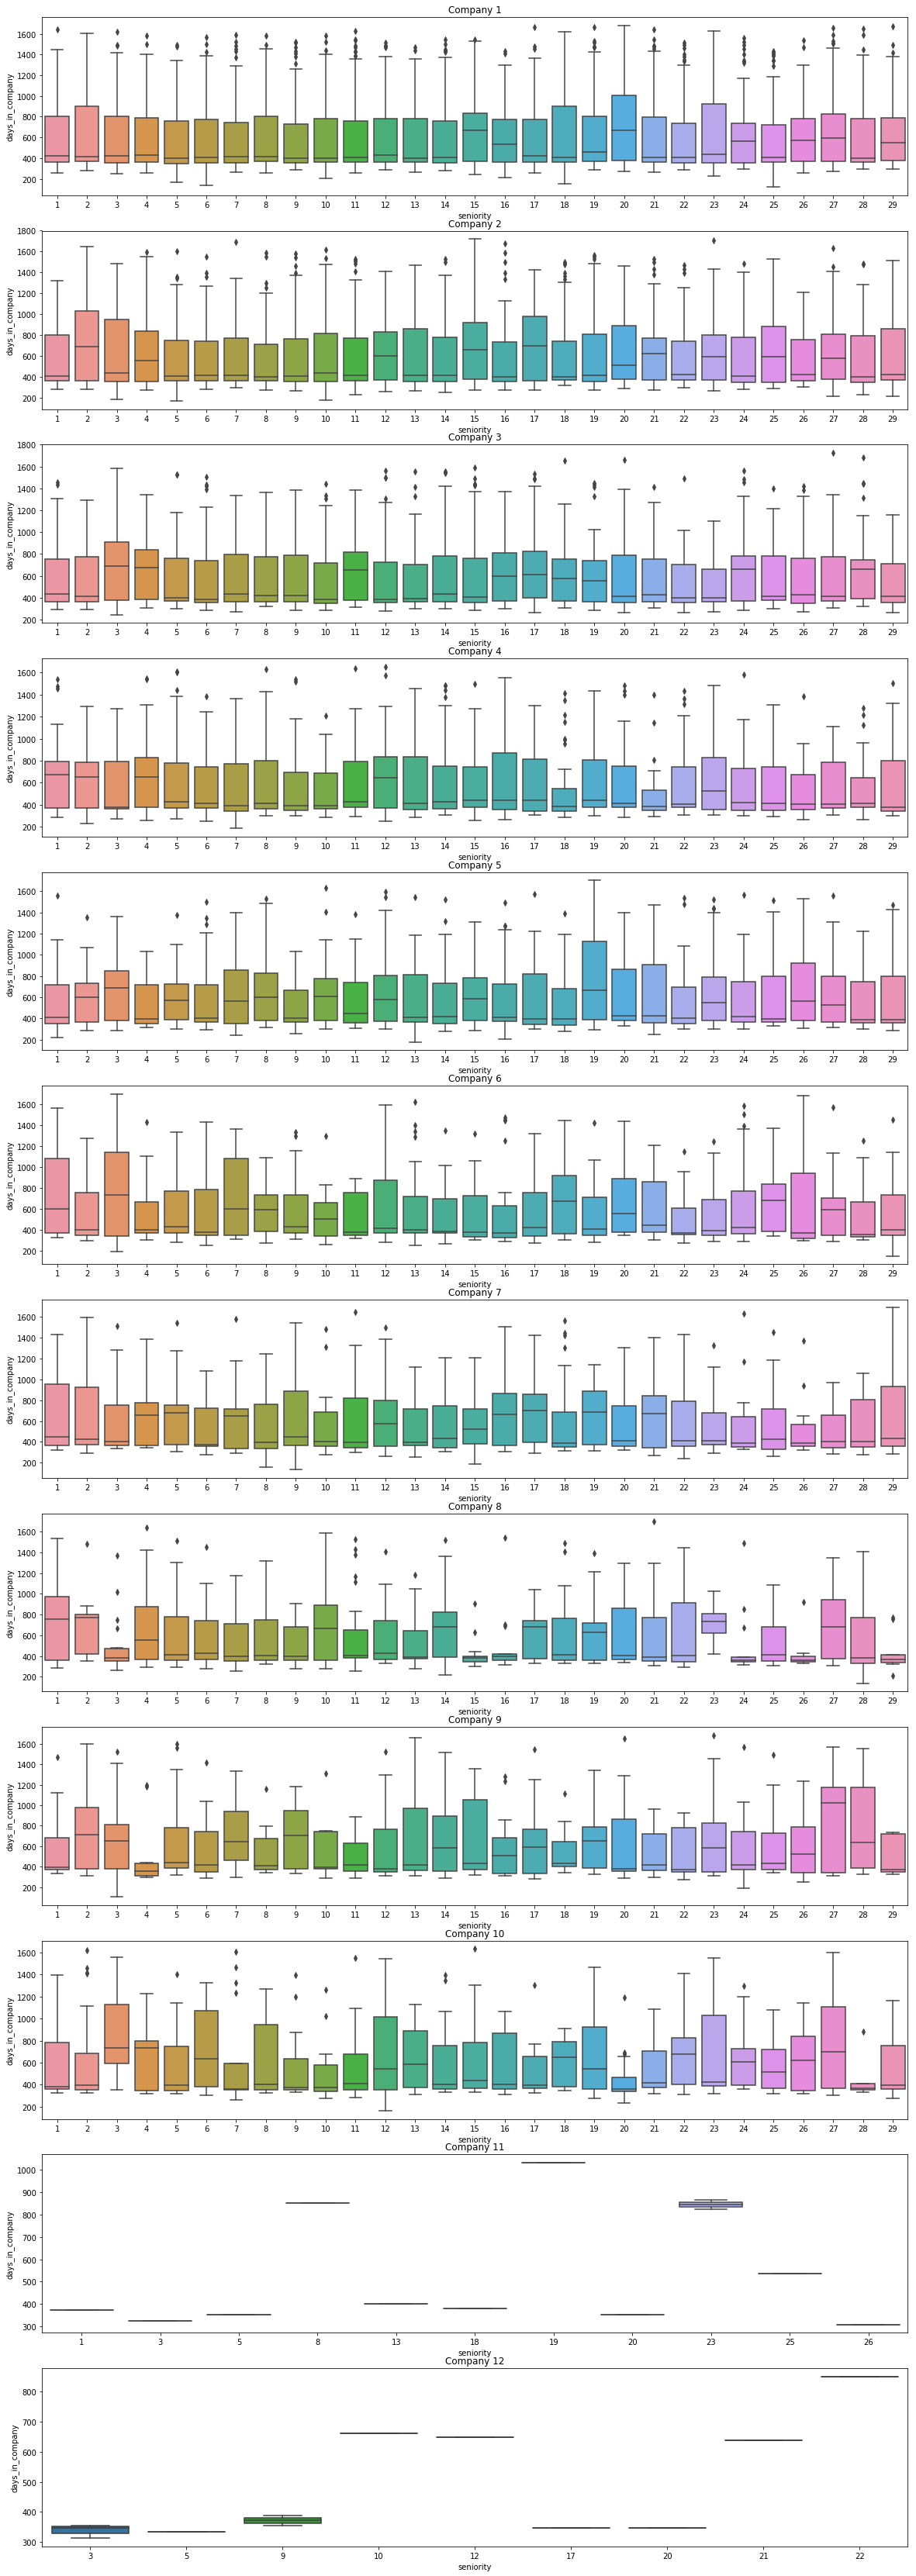

In [92]:
plt.figure(figsize=(20,60))
for i in range(12):
    plt.subplot(12,1,i+1)
    sns.boxplot(data=tmp[tmp['company_id']==i+1], x="seniority", y="days_in_company")
    plt.title("Company {}".format(i+1))

ImportError: cannot import name 'exception_to_str'

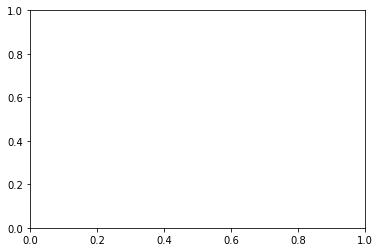

In [96]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = tmp['days_in_company']
E = tmp['quit_company']
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.median_
kmf.plot()

# Conclusion

Salary, seniority, survival analysis

Recommendations

First year the most important
Transparent salary disclosure